# PROBLEM STATEMENT:
###  MNIST Classification with Dense Neural Networks (using Tensorflow)

### GET THE DATA

In [ ]:

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

train_set = pd.read_csv(r"C:\Users\emekamichael\Downloads\fashion-mnist_train.csv\fashion-mnist_train.csv")
test_set = pd.read_csv(r"C:\Users\emekamichael\Downloads\fashion-mnist_test.csv\fashion-mnist_test.csv")


# Separate features and labels
train_images = train_set.drop('label', axis=1).values
train_labels = train_set['label'].values

test_images = test_set.drop('label', axis=1).values
test_labels = test_set['label'].values



### EDA

In [ ]:
train_set.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_set.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [ ]:
# Check data types
print("Data Types:")
print(train_set.dtypes)




Data Types:
label       int64
pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
            ...  
pixel780    int64
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
Length: 785, dtype: object


In [ ]:
# Check for missing values
print("\nMissing Values:")
print(train_set.isnull().sum())




Missing Values:
label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


In [ ]:
# Check class distribution
print("\nClass Distribution:")
print(train_set['label'].value_counts())


Class Distribution:
label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64


### Comment:
### class distribution is balanced with all classes having 6,000 observations

# DATA PREPROCESSING


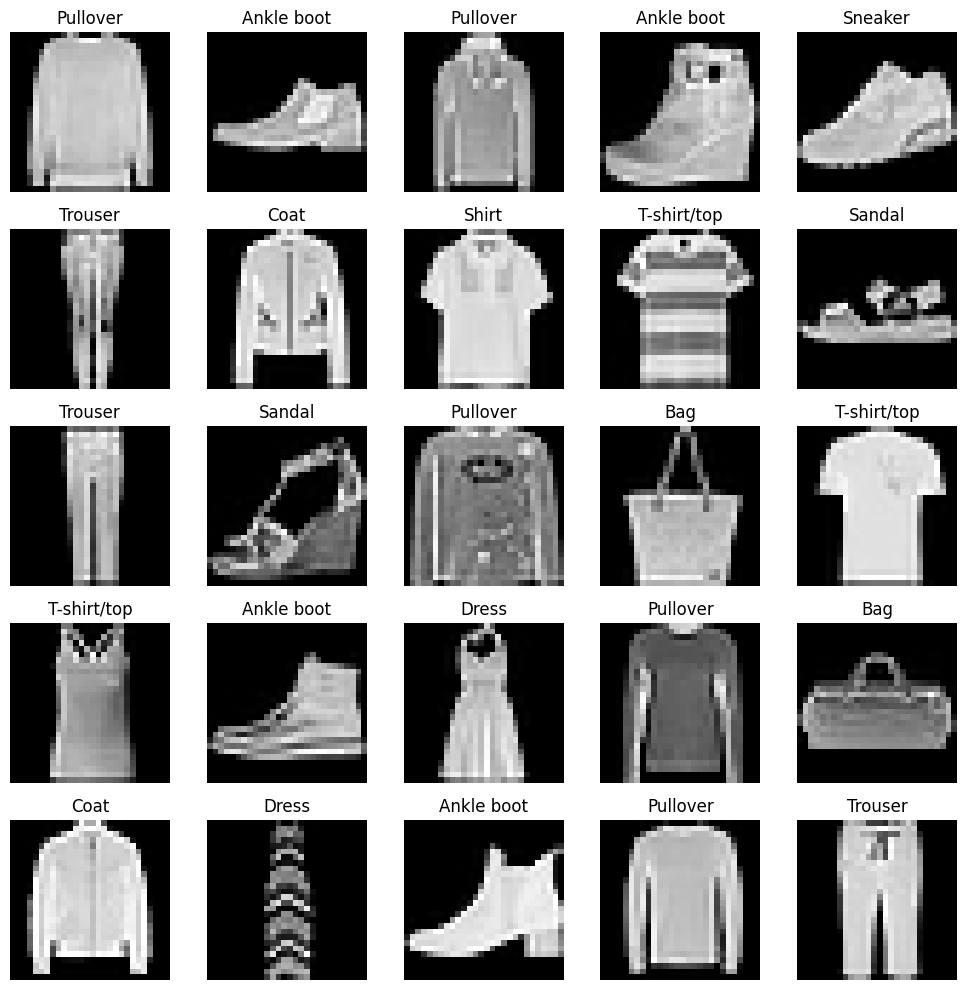

In [ ]:
import matplotlib.pyplot as plt


# Split the training set into train and validation sets
train_set, val_set = train_test_split(train_set, test_size=0.2, random_state=42)
# Extract training images and labels
train_images = train_set.drop('label', axis=1).values.reshape(-1, 28, 28)
train_labels = train_set['label'].values
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32



# Function to display random samples from the dataset
def display_random_samples(data, labels, class_names, num_samples=25, figsize=(10, 10)):
    # Generate random indices
    random_indices = np.random.choice(len(data), num_samples, replace=False)
    
    # Create subplots
    rows = int(np.sqrt(num_samples))
    cols = int(np.ceil(num_samples / rows))
    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    
    # Plot each sample
    for i, idx in enumerate(random_indices):
        row = i // cols
        col = i % cols
        ax = axes[row, col] if rows > 1 else axes[col]
        ax.imshow(data[idx], cmap='gray')
        ax.set_title(class_names[labels[idx]])
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Display random samples
display_random_samples(train_images, train_labels, class_names)


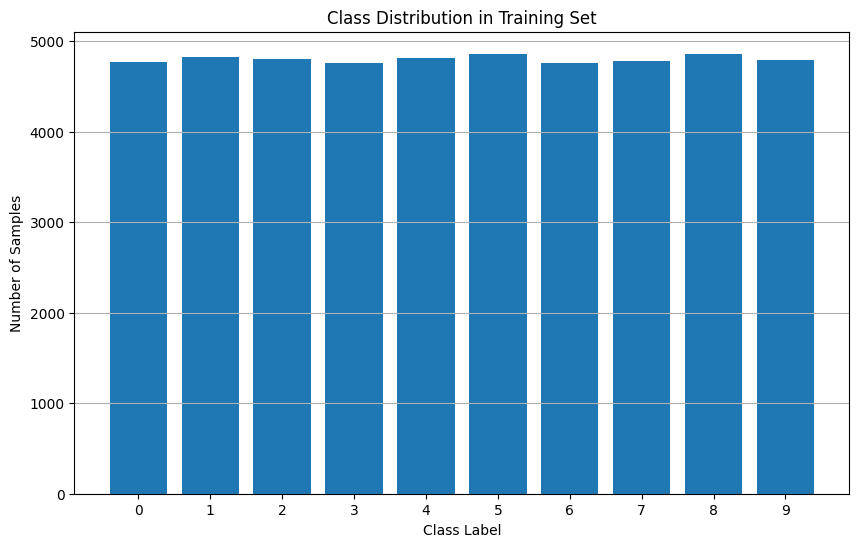

In [ ]:
import matplotlib.pyplot as plt

# Count the number of samples for each class
class_counts = train_set['label'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class Label')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Set')
plt.xticks(class_counts.index)
plt.grid(axis='y')
plt.show()



### Comment
### The bar plot above, we can see that the distribuiton is even 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler to the training data and transform it
train_set_scaled = scaler.fit_transform(train_set.drop('label', axis=1))

# Transform the test set using the scaler fitted on the training data
test_set_scaled = scaler.transform(test_set.drop('label', axis=1))


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
X = train_set_scaled[:, :-1]  # All columns except the last one
y = train_set_scaled[:, -1]   # Last column (labels)

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)




# MODEL TRAINING

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Define the model architecture
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',  # Using the Adam optimizer
              loss='sparse_categorical_crossentropy',  # sparse categorical crossentropy loss function for multi-class classification
              metrics=['accuracy'])  # Track accuracy as the evaluation metric

# Train the model
history = model.fit(train_set_scaled, train_set['label'],  # Train on normalized features and labels
                    epochs=10,  # Number of training epochs
                    batch_size=64,  # Batch size for training
                    validation_split=0.2)  # Validation split for monitoring validation accuracy





Epoch 1/10
240/600 [===========>..................] - ETA: 1s - loss: 0.6984 - accuracy: 0.7554

600/600 [==============================] - 4s 4ms/step - loss: 0.5655 - accuracy: 0.7999 - val_loss: 0.4675 - val_accuracy: 0.8359
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.4117 - accuracy: 0.8521 - val_loss: 0.3896 - val_accuracy: 0.8630
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3662 - accuracy: 0.8672 - val_loss: 0.3616 - val_accuracy: 0.8691
Epoch 4/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3382 - accuracy: 0.8778 - val_loss: 0.4110 - val_accuracy: 0.8452
Epoch 5/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3223 - accuracy: 0.8818 - val_loss: 0.3501 - val_accuracy: 0.8723
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.3003 - accuracy: 0.8898 - val_loss: 0.3372 - val_accuracy: 0.8820
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.2894 - accuracy: 0.8933 - val_loss: 0.3426 - val_accuracy: 0.8741
Epoch 8/10
600/60

# EVALUATION

In [ ]:

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(val_set.drop('label', axis=1), val_set['label'])

print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)



333/375 [=========================>....] - ETA: 0s - loss: 61.0317 - accuracy: 0.8426

375/375 [==============================] - 1s 2ms/step - loss: 61.3973 - accuracy: 0.8416
Validation Loss: 61.3973274230957
Validation Accuracy: 0.8415833115577698


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict probabilities for each class
y_probabilities = model.predict(val_set.drop('label', axis=1))

# Find the class with the highest probability for each sample
y_pred = np.argmax(y_probabilities, axis=1)

# True labels of the validation set
y_true = val_set['label']

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate classification report
class_report = classification_report(y_true, y_pred)
print("Classification Report:\n", class_report)


375/375 [==============================] - 1s 2ms/step


Accuracy: 0.8415833333333333
Confusion Matrix:
 [[ 803   28   31   50   20    0  295    0    5    0]
 [   0 1149    0   20    5    0    0    0    0    0]
 [   1   10  762    9  359    0   54    0    5    0]
 [   2   42    3 1058  120    0   15    0    2    0]
 [   0    3   26   19 1112    0   20    0    5    0]
 [   0    1    0    0    0 1013    0   37    7   83]
 [  65   11   66   27  254    0  803    0   16    1]
 [   0    0    0    0    0   12    0 1079    6  127]
 [   1    1    4    1   13    1    5    1 1122    0]
 [   0    0    0    0    0    1    0   10    1 1198]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.65      0.76      1232
           1       0.92      0.98      0.95      1174
           2       0.85      0.64      0.73      1200
           3       0.89      0.85      0.87      1242
           4       0.59      0.94      0.72      1185
           5       0.99      0.89      0.93      1141
           6      

### Run the model on the test_set

In [ ]:
# Predict labels for the test set
y_pred = model.predict(test_images)
# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)


# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred_labels)
print("Test Accuracy:", accuracy)

# Generate classification report
report = classification_report(test_labels, y_pred_labels, target_names=class_names)

# Print the classification report
print(report)





313/313 [==============================] - 1s 2ms/step
Test Accuracy: 0.8439
              precision    recall  f1-score   support

 T-shirt/top       0.92      0.65      0.76      1000
     Trouser       0.92      0.99      0.96      1000
    Pullover       0.86      0.63      0.73      1000
       Dress       0.91      0.85      0.88      1000
        Coat       0.62      0.95      0.75      1000
      Sandal       0.99      0.87      0.93      1000
       Shirt       0.68      0.68      0.68      1000
     Sneaker       0.95      0.86      0.90      1000
         Bag       0.95      0.97      0.96      1000
  Ankle boot       0.82      0.99      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.86      0.84      0.84     10000
weighted avg       0.86      0.84      0.84     10000



### Inference: 
### The model achieved an accuracy of approximately 86% on the test set. This result also confirms the consistency of the model as it achieved accuracy of 86% on the validation set earlier.


In [ ]:

from sklearn.metrics import precision_score

# Adjusted threshold
adjusted_threshold = 0.6

# Predict probabilities for the test set
y_probabilities = model.predict(test_images)

# Adjust predictions for class '5' based on the adjusted threshold
y_pred_adjusted = (y_probabilities[:, 5] >= adjusted_threshold).astype(int)

# Calculate precision for each class
precision = precision_score(test_labels, y_pred_adjusted, average=None)

# Print precision for each class
for i, class_name in enumerate(class_names):
    # Generate improved precision report with zero_division parameter set to 1
    new_precision = precision_score(test_labels, y_pred_adjusted, labels=[i], average=None, zero_division=1)
    print(f"Precision for class '{class_name}': {new_precision}")







313/313 [==============================] - 1s 2ms/step
Precision for class 'T-shirt/top': [0.10946746]
Precision for class 'Trouser': [0.]
Precision for class 'Pullover': [1.]
Precision for class 'Dress': [1.]
Precision for class 'Coat': [1.]
Precision for class 'Sandal': [1.]
Precision for class 'Shirt': [1.]
Precision for class 'Sneaker': [1.]
Precision for class 'Bag': [1.]
Precision for class 'Ankle boot': [1.]


c:\courses_conestoga\courses_conestoga\CSCN8010-LAB_RAN\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import recall_score

# Predict probabilities for the test set
y_probabilities = model.predict(test_images)

# Define the adjusted threshold for class '5'
adjusted_threshold = 0.4  # You can adjust this threshold value as needed

# Adjust predictions for class '5' based on the adjusted threshold
y_pred_adjusted = (y_probabilities[:, 5] >= adjusted_threshold).astype(int)

# Calculate recall for each class, handling zero division by setting zero_division=1
for i, class_name in enumerate(class_names):
    # Compute recall for the current class
    new_recall = recall_score(test_labels, y_pred_labels, labels=[i], average=None, zero_division=1)
    
    # Print the recall for the current class
    print(f"Recall for class '{class_name}': {new_recall}")



313/313 [==============================] - 1s 2ms/step
Recall for class 'T-shirt/top': [0.651]
Recall for class 'Trouser': [0.992]
Recall for class 'Pullover': [0.63]
Recall for class 'Dress': [0.852]
Recall for class 'Coat': [0.952]
Recall for class 'Sandal': [0.867]
Recall for class 'Shirt': [0.676]
Recall for class 'Sneaker': [0.859]
Recall for class 'Bag': [0.97]
Recall for class 'Ankle boot': [0.99]


### comparing the recall and precion of the original model, with the values when the threshold is adjusted, we can understand that reducing the threshold value increases the recall and increasing the threshold values increases the preciion.


| Class        | Original Precision | New Precision | Original Recall | New Recall |
|--------------|--------------------|---------------|-----------------|------------|
| T-shirt/top  | 0.84               | [0.108]         | 0.82            | 0.825      |
| Trouser      | 0.95               | [0.0011]        | 0.99            | 0.989      |
| Pullover     | 0.87               | 1             | 0.70            | 0.703      |
| Dress        | 0.95               | 1             | 0.79            | 0.794      |
| Coat         | 0.63               | 1             | 0.95            | 0.953      |
| Sandal       | 0.99               | 1             | 0.90            | 0.896      |
| Shirt        | 0.78               | 1             | 0.60            | 0.603      |
| Sneaker      | 0.94               | 1             | 0.84            | 0.849      |
| Bag          | 0.94               | 1             | 0.98            | 0.982      |
| Ankle boot   | 0.84               | 1             | 0.98            | 0.987      |


### Inference: Notice from the above table that all values for "New Precision" was increased to 1 which means accurate prediction, except for classes Tshirt and Trouser which increased relatively by 0.108 and 0.0011 respectively.
### Again notice the slight increase in new recall across board. By adjusting the thresehold(increase or decrease), we can see the impact 


# CONCLUSION:
### Our findings underscore the importance of tailoring model performance to specific use cases and objectives. In scenarios where false positives are particularly costly(like in our case), prioritizing precision might be paramount, whereas in contexts where capturing all relevant instances is crucial, optimizing recall could take precedence.

### By adjusting the threshold and evaluating precision and recall metrics, stakeholders can fine-tune model behavior to align with their desired outcomes.